# Principal Component Analysis: real data

## This is a simple step by step implementation of Principal Component Analysis (PCA) to the Iris dataset. Feel free to use it for your own projects and datasets.

In [32]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("CompPCA.csv", header = None)    #Reading in the data as a Pandas dataframe

#### Let's view the first 15 rows of the data first

In [34]:
df.head(15)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## De-meaning the data, i.e. subtracting the column mean from each element in the respective column

In [35]:
df = df - df.mean()

#### The data now looks like this

In [36]:
df.head(15)

,0,1,2,3
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
5,-0.443333,0.846,-2.058667,-0.798667
6,-1.243333,0.346,-2.358667,-0.898667
7,-0.843333,0.346,-2.258667,-0.998667
8,-1.443333,-0.154,-2.358667,-0.998667
9,-0.943333,0.046,-2.258667,-1.098667


## We shall now proceed to obtaining the dot product of X<sup>T</sup> and X; where X represents the de-meaned data (in this case dataframe df)

In [37]:
df_cov = np.dot(np.transpose(df.values),df.values)

#### X<sup>T</sup>X looks like this

In [38]:
df_cov

array([[ 102.16833333,   -5.851     ,  189.77866667,   77.01866667],
       [  -5.851     ,   28.0126    ,  -47.9352    ,  -17.5792    ],
       [ 189.77866667,  -47.9352    ,  463.86373333,  193.16173333],
       [  77.01866667,  -17.5792    ,  193.16173333,   86.77973333]])

## We shall now obtain the eigen values and eigen vectors of X<sup>T</sup>X so that we can have the principal axes for our data and their respective variances

In [39]:
w,v = np.linalg.eig(df_cov)

## Eigen values of X<sup>T</sup>X a.k.a. variances of the components

In [40]:
w

array([ 629.50127448,   36.09429217,   11.70006231,    3.52877104])

## Eigen vectors of X<sup>T</sup>X a.k.a. principal axes
#### The columns in v represent the principal components

In [41]:
v

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [42]:
w_percent = (w/np.sum(w))*100                 #This provides us with the percent of variability contained within each component
print(w, '\033[1m'+" -> eigenvalues" +'\033[0m')
print(w_percent, '\033[1m' + " -> percent of variability explained")

[ 629.50127448   36.09429217   11.70006231    3.52877104]  -> eigenvalues
[ 92.46162072   5.30155679   1.71851395   0.51830855]  -> percent of variability explained


### It seems like the first principal component has the majority of the variance (92.46%) while the others have very small variances. 
## This indicates that the projection of our data on to the first component will provide us with a compressed data having minimum information loss from the original data
### Let's look at the percentage of variance contained by each component in a graphical setting 

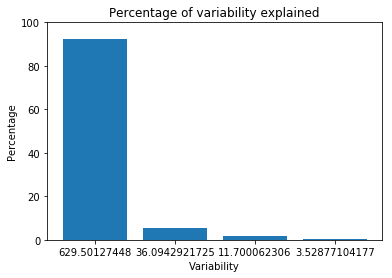

In [43]:
plt.bar(np.arange(len(w)),list(w_percent))
plt.xticks(np.arange(len(w)),list(w))
plt.title("Percentage of variability explained")
plt.xlabel("Variability")
plt.ylabel("Percentage")
plt.ylim(ymax = 100)
plt.show()

## Despite having low variance on the second principal axes, lets project our data onto the first two principal components to obtain a 2d representation on a scatter plot

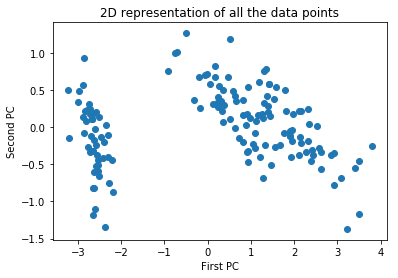

In [44]:
prin_comp_2d = np.dot(df.values,v[:,:2])
x = prin_comp_2d[:,0]
y = prin_comp_2d[:,1]
plt.scatter(x,y)
plt.title("2D representation of all the data points")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

## From the scatter plot, 2 clusters are evident which could possibly mean that the dataset represents 2 distinct species of flowers

# The next section provides the same implementation but this time with standardized data

In [45]:
df_new = pd.read_csv("CompPCA.csv", header = None)     #Reading in the data as a Pandas dataframe

## De-meaning the data, i.e. subtracting the column mean from each element in the respective column and standardizing the data, i.e. scaling by the inverse of the sample standard deviation

In [46]:
df_new = (df_new - df_new.mean())/df_new.std()

#### Viewing the fir 15 rows of the de-meaned and standardized data

In [47]:
df_new.head(15)

,0,1,2,3
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
5,-0.535384,1.951133,-1.166767,-1.046525
6,-1.501490,0.797981,-1.336794,-1.177559
7,-1.018437,0.797981,-1.280118,-1.308593
8,-1.743017,-0.355171,-1.336794,-1.308593
9,-1.139200,0.106090,-1.280118,-1.439627


## We shall now proceed to obtaining the dot product of X<sup>T</sup> and X; where X represents the de-meaned and standardized data(in this case dataframe df_new)

In [48]:
df_new_cov = np.dot(np.transpose(df_new.values),df_new.values)

#### X<sup>T</sup>X looks like this

In [49]:
df_new_cov

array([[ 149.        ,  -16.29601824,  129.89136944,  121.87509137],
       [ -16.29601824,  149.        ,  -62.65689836,  -53.12506935],
       [ 129.89136944,  -62.65689836,  149.        ,  143.45080746],
       [ 121.87509137,  -53.12506935,  143.45080746,  149.        ]])

## We shall now obtain the eigen values and eigen vectors of X<sup>T</sup>X so that we can have the principal axes for our data and their respective variances

In [50]:
w,v = np.linalg.eig(df_new_cov)

## Eigen values of X<sup>T</sup>X a.k.a. variances of the components

In [51]:
w

array([ 433.71189448,  137.26191868,   21.95563847,    3.07054838])

## Eigen vectors of X<sup>T</sup>X a.k.a. principal axes
#### The columns in v represent the principal components

In [52]:
v

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [53]:
w_percent = (w/np.sum(w))*100                 #This provides us with the percent of variability contained within each component
print(w, '\033[1m'+" -> eigenvalues" +'\033[0m')
print(w_percent, '\033[1m' + " -> percent of variability explained")

[ 433.71189448  137.26191868   21.95563847    3.07054838]  -> eigenvalues
[ 72.77045209  23.03052327   3.68383196   0.51519268]  -> percent of variability explained


### It seems like the first principal component has the majority of the variance (72.77%) followed by the second principal component (23.03%)  while the others have very small variances. The first two components provide a cumulative variability percentage of 95.8%
## This indicates that the projection of our data on to the first and second component will provide us with a compressed data having minimum information loss from the original data
### Let's look at the percentage of variance contained by each component in a graphical setting 

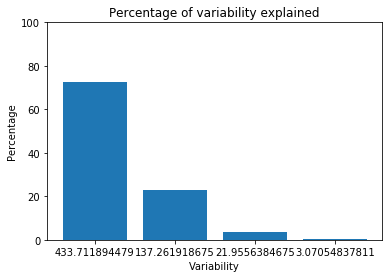

In [56]:
plt.bar(np.arange(len(w)),list(w_percent))
plt.xticks(np.arange(len(w)),list(w))
plt.title("Percentage of variability explained")
plt.xlabel("Variability")
plt.ylabel("Percentage")
plt.ylim(ymax = 100)
plt.show()

## Lets project our data onto the first two principal components to obtain a 2d representation on a scatter plot

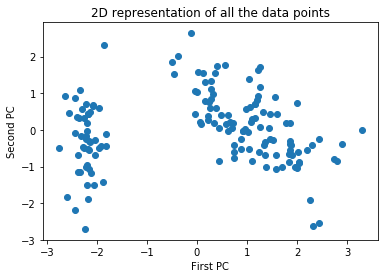

In [57]:
prin_comp_2d_new = np.dot(df_new.values,v[:,:2])
x = prin_comp_2d_new[:,0]
y = prin_comp_2d_new[:,1]
plt.scatter(x,y)
plt.title("2D representation of all the data points")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

## From the scatter plot, 2 clusters are evident which could possibly mean that the dataset represents 2 distinct species of flowers